<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Introduction_to_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary Statistics**
* df.describe()

## **Descriptive Statistics**
* Describe and summarize data

## **Inferential Statistics**
* Use a sample of data to make inferences about a larger population

## **Numeric (Quantitative Data)**
* Summary statistics
* Scatterplots

### **Continous (Measured)**
* Airplane speed
* Time spent waiting in line

### **Discrete (Counted)**
* Number of pets
* Number of packages shipped

## **Categorical (Qualitative Data)**
* **Can be represented as numbers**
* **Does not make rthem numeric variables**
* Countplot
* Barplot

### **Nominal (Unordered)**
* Married / Unmarried (1 / 0)
* Country of residence (1, 2, 3, ...)

### **Ordinal (Ordered)**
* Survey question (Strongly disagree - 1 / Neither - 2 / Strongly agree - 3)




In [15]:
# import libraries and datasets
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import uniform

amir_deals = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/amir_deals.csv')
happiness = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/world_happiness.csv')
food = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/food_consumption.csv')

# **Measures of Center**

## **Mean**
* Average
* np.mean
* More sensitive to outliers
* Gets pulled in the direction of skew

## **Median**
* Centre
* 50% | 50%
* Sort and take middle
* np.median
* Better for skewed data

## **Mode**
* Most frequent value
* statistics.mode
* Often used for categtrical variables


In [ ]:
# Mean, Median and Mode in Numerical Variables

mean = np.mean(amir_deals['amount'])
median = np.median(amir_deals['amount'])
mode = statistics.mode(amir_deals['amount'])

print(f"Mean: {mean} | Median: {median} | Mode: {mode}")



Mean: 4812.000337078652 | Median: 4805.1900000000005 | Mode: 7389.52


In [ ]:
# Mode in Categorical Variable
statistics.mode(amir_deals['product'])


'Product B'

   country food_category  consumption  co2_emission
55     USA          pork        27.64         97.83
56     USA       poultry        50.01         53.72
57     USA          beef        36.24       1118.29
58     USA     lamb_goat         0.43         15.06
59     USA          fish        12.35         19.72


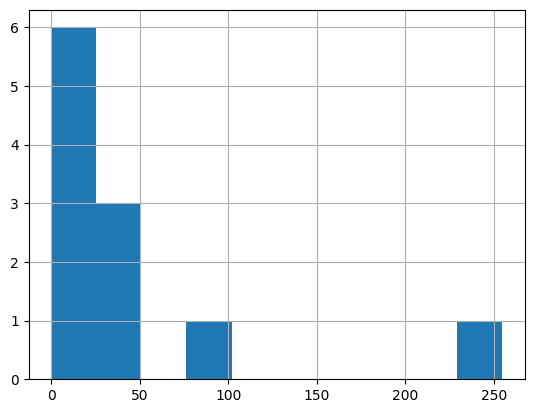

mean      156.26
median     15.34
Name: co2_emission, dtype: float64


<ipython-input-17-c103184923d3>:7: FutureWarning: The provided callable <function mean at 0x7b72abfe55a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))
<ipython-input-17-c103184923d3>:7: FutureWarning: The provided callable <function median at 0x7b72a9214ca0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))


In [ ]:
usa = food[food['country'] == 'USA']
print(usa.head())

usa['consumption'].hist()
plt.show()

print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))

# **Measures of Spread**

## **Variance**
* Average distance from each data point to mean
* Calculate distance between each data point and mean
* Divide sum of squared diatances by number of data points - 1
* Higher variance = more spread out data
* np.var
* np.var['values], ddof=1
* ddof = 1 for sample data
* Population variance is calculated without ddof argument

# **Standard Deviation**
* Square root of Variance
* np.std
* ddof = 1
* Easier to understand since they are not squared

## **Mean absolute deviation**
* Takes absolute value of distances to mean and takes mean of those differences
* Similar to SD but not same
* SD squares distances, penalizing longer distances more than shorter ones
* MAD penalizes each distance equally
* SD is more common than MAD

## **Quantiles (Percentiles)**
* Split data into some number of equal parts
* np.quantile
* np.quantile(msleep['sleep_total'], 0.5)
* 0.5 Quantile = Median
* Split data into 4 equal parts = Quartiles
* np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1)
* Boxplots use quartiles
* np.linspace (start, stop, num_intervals)
* np.quantile(msleep['slep+otal'], np.linspace(0, 1, 5))

## **Interquartile Range (IQR)**
* Distance between 25th and 75th percentile
* from scipy.stats import iqr
* iqr(msleep['sleep_total'])

## **Outliers**
* Data points substantially different from the others
* data < Q1 - 1.5 X IQR or
* data > Q3 + 1.5 X IQR
* Find 1st and 3rd percentile and IQR and subset





In [2]:
var = np.var(food['co2_emission'], ddof=1)

std = np.std(food['co2_emission'],ddof=1)

# Calculate Mean Absolute Deviation
dists = food['co2_emission'] - np.mean(food['co2_emission'])
mad = np.mean(np.abs(dists))


qrt = np.quantile(food['co2_emission'], [0, 0.25, 0.5, 0.75, 1])
iqr_value = iqr(food['co2_emission'])
print(f"Variance: {var} | Standard Deviation: {std}\n Quartiles: {qrt} | IQR {iqr_value} | MAD : {mad}")

Variance: 23133.973638558353 | Standard Deviation: 152.09856553747755
 Quartiles: [   0.        5.21     16.53     62.5975 1712.    ] | IQR 57.3875 | MAD : 89.68155844295565


In [3]:
# Find Outliers
from scipy.stats import iqr

# Find IQR
iqr = iqr(food['co2_emission'])

# Find lower and upper thresholds
lower_threshold = np.quantile(food['co2_emission'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(food['co2_emission'], 0.75) + 1.5 * iqr

# Subset to find outliers
food_outliers = food[(food['co2_emission'] < lower_threshold) | (food['co2_emission'] > upper_threshold)]
print(food_outliers.value_counts())


country           food_category  consumption  co2_emission
Albania           beef           22.50        694.30          1
                  dairy          303.72       432.62          1
Myanmar           rice           132.80       169.94          1
Nepal             beef           7.89         243.47          1
Netherlands       beef           17.67        545.26          1
                                                             ..
French Polynesia  beef           30.90        953.51          1
Georgia           beef           6.04         186.38          1
                  dairy          149.26       212.61          1
Germany           beef           13.16        406.09          1
Zimbabwe          beef           7.37         227.42          1
Name: count, Length: 208, dtype: int64


In [4]:
food['co2_emission'].describe()

,co2_emission
count,1430.000000
mean,74.383993
std,152.098566
min,0.000000
25%,5.210000
50%,16.530000
75%,62.597500
max,1712.000000


<ipython-input-5-b003849abed0>:2: FutureWarning: The provided callable <function var at 0x7b40f0df97e0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  print(food.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
<ipython-input-5-b003849abed0>:2: FutureWarning: The provided callable <function std at 0x7b40f0df96c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(food.groupby('food_category')['co2_emission'].agg([np.var, np.std]))


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


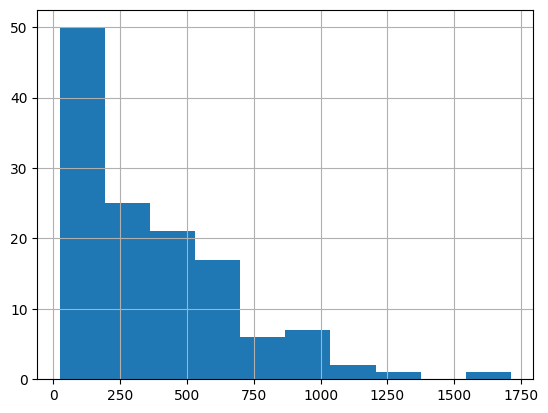

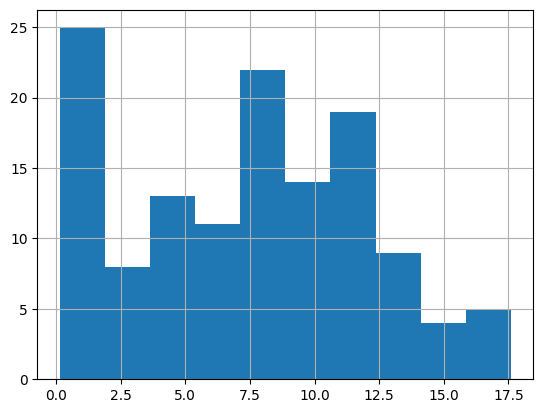

In [5]:
# Print variance and sd of co2_emission for each food_category
print(food.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food[food['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food[food['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [6]:
# Calculate the quintiles of co2_emission
print(np.quantile(food['co2_emission'], np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [7]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
print(f'q1: {q1} | q3 {q3} | IQR {iqr}')

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64
q1: 446.66 | q3 1111.1525000000001 | IQR 664.4925000000001


# **Probability**

## **Sampling**
* sample()
* np.random.seed()

## **Sampling without replacement**
* Dependent event
* sample(n)

## **Sampling with replacement**
* Independent event
* sample(n, replace = True)

In [8]:
np.random.seed(42)
amir_deals.sample(10)

,product,client,status,amount,num_users
19,Product I,Current,Won,3220.45,45
45,Product B,Current,Won,8614.12,17
140,Product B,Current,Lost,5856.18,45
30,Product C,New,Won,6151.14,66
67,Product B,Current,Won,4571.26,19
16,Product D,Current,Won,5282.57,58
119,Product B,Current,Won,1597.44,37
174,Product D,Current,Won,6377.50,12
109,Product H,Current,Won,5257.16,22
141,Product B,Current,Won,4795.64,8


# **Discrete Distributions**
* Represent situations with discrete outcomes
* Counted variables

## **Probability Distribution**
* Expected value of distribution = mean of distribition

## **6-sided fair die**
* Expected value = (1X1/6) + (2X1/6) +(3X1/6) +(4X1/6) +(5X1/6) +(6X1/6) = 3.5
* Visualize with barplot and take areas
* P(die roll) <=2 = 1/3
* **Discrete Uniform Distribution**

## **Swap 2 with 3 (no 2, 2X3)**
* P(uneven die roll) <=2 = 1/6

## **Law of Large Numbers**
**As the size of the sample increases, the sample mean will approach the theoretical mean**




Expected (theoratical) Value: 3.5 | 1000 Sample Mean Value: 3.534


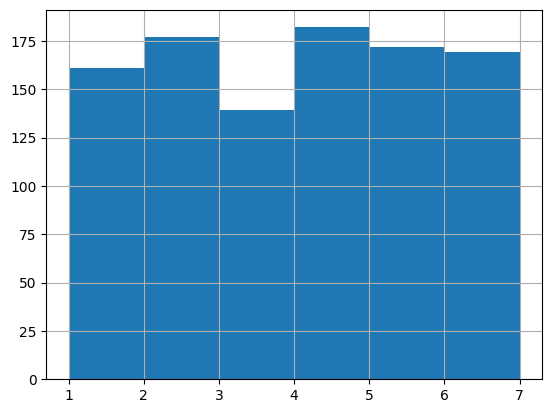

In [13]:
# Build 6-sided fair die dataframe with probability
number = [1, 2, 3, 4, 5, 6]
probability = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die = pd.DataFrame({'number': number, 'probability': probability})

# Expected value (mean of distribution)
exp = np.sum(die['number'] * die['probability'])

# 1000 samples with replacement
rolls_1000 = die.sample(1000, replace = True)

# Visualize with histogram
rolls_1000['number'].hist(bins = np.linspace(1, 7, 7))
plt.show

# Mean of 1000 samples
smp = np.mean(rolls_1000['number'])

print(f"Expected (theoratical) Value: {exp} | 1000 Sample Mean Value: {smp}")

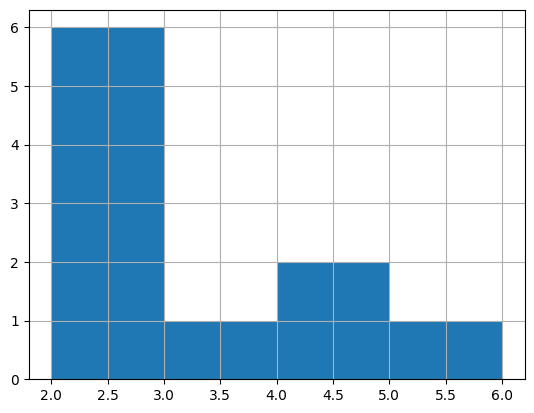

0.30000000000000004


In [14]:
# Create dataframe of 10 groups with different sizes
group_id = ['A','B','C','D','E','F','G','H','I','J']
group_size = [2,4,6,2,2,2,3,2,4,2]
restaurant_groups=pd.DataFrame({'group_id':group_id,'group_size':group_size})


# Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]
restaurant_groups['group_size'].hist(bins=np.linspace(2,6,5))
plt.show()

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)